In [8]:
import pandas as pd

In [96]:
geo_select_gene = pd.read_csv("../test.txt", sep="\t", index_col=0)

In [97]:
geo_select_gene

,sample_type,SCNM1,AATF,SCAMP3,ATIC,RBM34,PSMG3,ATP5G2,ECT2,XPO1,...,NUP107,POLA1,MSH2,SAP130,ILF3,U2AF2,DBR1,TPM3,GPAA1,NSMCE2
sample_barcode,,,,,,,,,,,,,,,,,,,,,
TCGA-G3-A3CH-11,0,3.519769,3.593341,4.418902,4.550264,4.082390,3.504622,7.926138,0.333419,3.552120,...,2.260043,0.650778,0.941119,1.541001,3.589764,4.532940,1.464672,5.676068,5.013427,2.707049
TCGA-DD-AAW0-01,1,5.155028,4.245649,6.191950,5.270530,5.255141,4.434922,7.994263,2.042638,4.832396,...,3.292811,0.948623,2.217237,2.657654,4.434922,5.657637,2.321960,7.448276,6.506638,4.362427
TCGA-DD-AACA-01,1,4.307393,5.233818,6.018407,5.932395,4.872847,4.249439,8.659070,2.336301,4.754314,...,3.533560,2.017935,2.358966,3.054876,5.398871,6.041351,2.241870,6.994051,7.080290,4.922234
TCGA-DD-A3A6-11,0,3.443646,3.876804,5.056183,5.322280,3.816597,4.201635,8.281838,0.176318,2.403256,...,1.405967,0.298665,0.505893,0.848008,2.970847,3.880718,1.014364,4.759707,5.473117,1.757046
TCGA-K7-AAU7-01,1,4.724666,4.961611,5.363539,6.469061,5.381593,5.230703,8.991534,3.184264,5.059190,...,4.433587,1.432970,2.763401,2.599299,6.226675,6.601519,2.307414,7.300770,7.434456,5.242580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-DD-A1ED-01,1,3.195307,3.508453,4.449519,4.713699,4.046095,3.316182,7.639944,1.028584,3.752784,...,2.558243,0.669016,1.516029,1.790740,3.922243,4.794974,1.411456,5.704310,4.916916,3.783457
TCGA-2Y-A9H8-01,1,5.368027,4.718124,6.424083,4.968581,5.218050,5.426312,8.235789,1.831872,4.188210,...,3.288321,1.565604,2.513463,2.330528,5.146476,6.104795,1.584948,7.113347,5.933772,3.563193
TCGA-2Y-A9GT-01,1,3.658780,3.615921,4.741509,4.066962,3.670203,3.493135,7.605320,1.292754,4.249439,...,2.462014,0.773987,1.811498,2.173141,4.665634,5.488661,1.570444,5.813262,5.550876,3.137540


In [114]:
s = setup(geo_select_gene, target = 'sample_type', fix_imbalance=True, silent=True)

,Description,Value
0,session_id,8971
1,Target,sample_type
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(419, 21)"
5,Missing Values,False
6,Numeric Features,20
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [134]:
s[8]

,SCNM1,AATF,SCAMP3,ATIC,RBM34,PSMG3,ATP5G2,ECT2,XPO1,SMC4,NUP107,POLA1,MSH2,SAP130,ILF3,U2AF2,DBR1,TPM3,GPAA1,NSMCE2
sample_barcode,,,,,,,,,,,,,,,,,,,,
TCGA-DD-A1EC-01,4.209486,4.452191,5.544711,5.647934,4.685909,5.321890,8.127363,3.166743,4.446274,3.386817,3.051358,1.405967,2.032121,2.599299,5.286118,5.742279,2.516021,6.811985,6.300107,3.936447
TCGA-DD-AAED-01,5.295765,5.249104,5.676362,7.072448,7.003377,5.233039,8.965586,1.867870,4.751714,3.097631,3.416880,1.163497,2.510988,1.815578,5.778499,4.992790,1.996368,6.362424,6.286187,4.527965
TCGA-MI-A75G-01,4.795456,3.440921,6.038889,5.731975,5.169513,5.170290,8.322210,1.214108,4.356813,2.257036,2.347703,0.757041,1.786617,2.028570,4.539735,5.410100,2.211038,6.189977,6.184257,3.507176
TCGA-CC-A9FW-01,4.940612,5.349100,6.292209,6.052283,5.684500,4.954643,8.956604,1.269023,4.374322,2.475126,3.914585,1.372931,2.833883,2.924102,5.242969,6.203195,1.799072,6.753025,6.926200,4.365281
TCGA-DD-A1EL-11,2.987353,3.333468,4.575932,4.693215,4.057467,3.467278,7.837913,0.748450,3.869908,1.682574,2.182726,0.713697,1.304513,1.664510,3.613533,4.911695,1.448897,5.681166,5.163096,2.941138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-G3-A25U-01,4.550264,4.205513,5.053564,5.231092,3.779284,5.018854,8.081730,2.643863,5.840671,3.839931,3.416880,1.992771,3.122657,2.482841,5.084029,6.012599,2.111018,6.420920,6.151420,4.249439
TCGA-CC-A8HU-01,6.389594,5.479276,7.213444,5.903973,5.906628,6.789983,9.717513,3.127616,5.360026,3.740937,4.061791,3.073808,3.496963,2.823742,5.843717,5.992319,2.166684,7.216325,6.237628,4.545956
TCGA-DD-AACG-01,5.494137,5.610897,6.791272,8.073958,6.223814,5.350465,8.692188,2.604061,4.632316,3.289848,2.438315,0.903017,2.430245,2.014321,4.263750,4.458108,1.992771,6.289839,7.185535,4.787167


* Classification Model

```
xgboost, et, catboost, dt, lightgbm, rf
```

In [117]:
best = compare_models(include=['xgboost', 'et', 'catboost', 'lightgbm', 'rf'], 
                     sort = "MCC", retrun)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9693,0.9980,0.9805,0.9849,0.9823,0.8650,0.8751,0.1260
catboost,CatBoost Classifier,0.9693,0.9970,0.9766,0.9883,0.9823,0.8674,0.8723,1.7080
rf,Random Forest Classifier,0.9693,0.9980,0.9806,0.9849,0.9824,0.8597,0.8693,0.0190
lightgbm,Light Gradient Boosting Machine,0.9659,0.9970,0.9765,0.9846,0.9802,0.8531,0.8591,0.0890
xgboost,Extreme Gradient Boosting,0.9659,0.9961,0.9766,0.9846,0.9804,0.8478,0.8533,0.1490


In [121]:
pull()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9693,0.9980,0.9805,0.9849,0.9823,0.8650,0.8751,0.126
catboost,CatBoost Classifier,0.9693,0.9970,0.9766,0.9883,0.9823,0.8674,0.8723,1.708
rf,Random Forest Classifier,0.9693,0.9980,0.9806,0.9849,0.9824,0.8597,0.8693,0.019
lightgbm,Light Gradient Boosting Machine,0.9659,0.9970,0.9765,0.9846,0.9802,0.8531,0.8591,0.089
xgboost,Extreme Gradient Boosting,0.9659,0.9961,0.9766,0.9846,0.9804,0.8478,0.8533,0.149


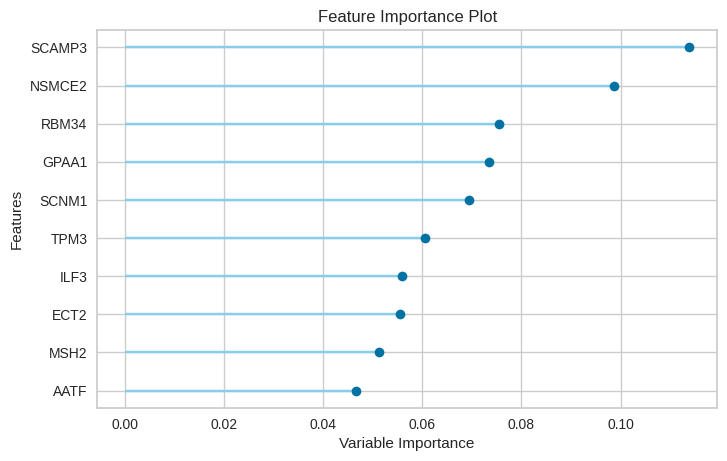

In [128]:
plot_model(best, plot = 'feature', use_train_data=True, save=False)

In [151]:
feature_importance = pd.DataFrame(best.feature_importances_, 
             index=geo_select_gene.columns.to_list()[1:], columns=['Importance_value'])

* interpret model

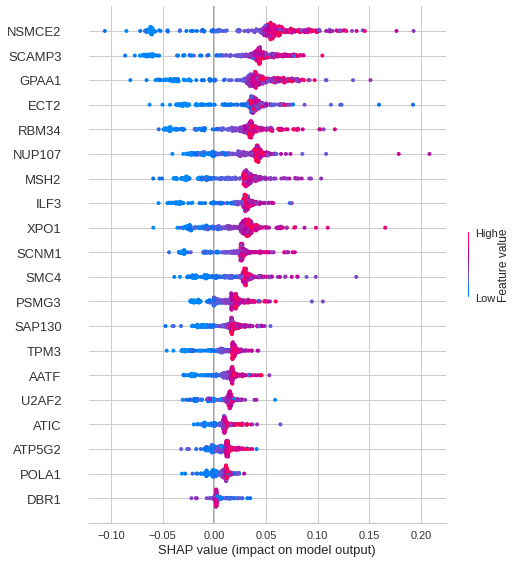

In [126]:
interpret_model(best, plot = 'summary', use_train_data=True)

In [113]:
interpret_model(best, plot = 'reason', use_train_data=True)

In [ ]:
interpret_model(best, use_train_data=True)

In [ ]:
best = compare_models()